# Otimização de portifólio de ações usando Python

  A otimização de carteiras é o processo de seleção da melhor carteira (distribuição de ativos), do conjunto de todas as carteiras consideradas, de acordo com algum objetivo. O objetivo normalmente maximiza fatores como retorno esperado e minimiza custos como risco financeiro.
-[Wikipedia](https://en.wikipedia.org/wiki/Portfolio_optimization)

  Neste Notebook, vou mostrar como criar um programa para otimizar uma carteira de ações usando a fronteira eficiente e Python! Na [teoria moderna de portifólio](https://pt.wikipedia.org/wiki/Teoria_moderna_do_portf%C3%B3lio), a fronteira eficiente é uma carteira de investimento que ocupa as partes "eficientes" do espectro de risco-retorno. Formalmente, é o conjunto de carteiras que satisfazem a condição de que não exista outra carteira com maior retorno esperado, mas com o mesmo desvio padrão de retorno.

In [1]:
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1 Criando um portifólio fictício
Neste notebook vou usar as ações de empresas de tecnologia conhecidas como FAANG (Facebook, Amazon , Apple, Netflix e Google).

In [4]:
# lista com os stickers das ações
assets = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
assets

['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

## 1.1 Definindo os pesos das ações no portifólio (5 * 20%)

In [3]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [5]:
# data de inicio
stockStartDate = '2013-01-01'

# data de fim
today = datetime.today().strftime('%Y-%m-%d')

In [7]:
# cria o dataframe que irá armazenar o Adj Close das ações
df = pd.DataFrame()

# obtendo os dados do yahoo.finance
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start=stockStartDate, end = today)['Adj Close']

In [10]:
# mostrando o dataframe
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.065252,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.849854,13.798572,360.483826
2013-01-04,28.760000,259.149994,16.380503,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.284145,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.327978,13.880000,365.280823
...,...,...,...,...,...
2020-12-15,275.549988,3165.120117,127.879997,519.780029,1767.770020
2020-12-16,275.670013,3240.959961,127.809998,524.830017,1763.000000
2020-12-17,274.480011,3236.080078,128.699997,532.900024,1747.900024


In [18]:
len(df)

2008

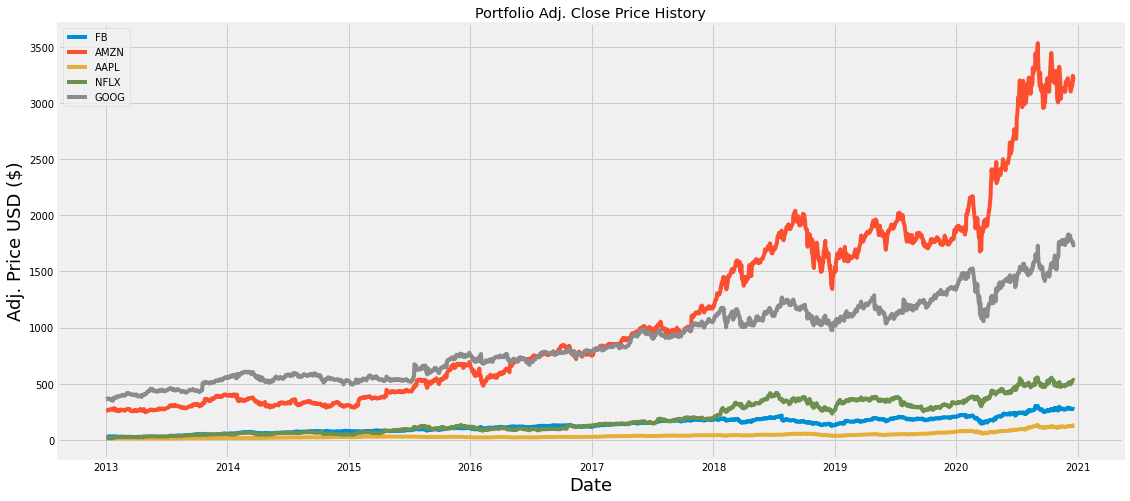

In [15]:
# Visualizando nossas ações
title = 'Portfolio Adj. Close Price History'

# Obtendo os dados para o gráfico
my_stocks = df

#Create and plot the graph
plt.figure(figsize=(17,8)) 

# obtendo as ações por dia
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)

  
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

# 2 - Cálculos Financeiros
Para visualizarmos os retornos diários precisamos calcular o (preço_novo + -preço_antigo)/preço_antigo ou (preço_novo / preço_antigo)-1.

In [17]:
# a função pct_change nos informa o retorno diário
returns = df.pct_change() 
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-12-15,0.004960,0.002582,0.050090,-0.005053,0.004381
2020-12-16,0.000436,0.023961,-0.000547,0.009716,-0.002698
2020-12-17,-0.004317,-0.001506,0.006963,0.015376,-0.008565


## 2.1 Matriz de Covariância

 A matriz de covariância é um conceito matemático comumente usado em estatísticas ao comparar amostras de dados de diferentes populações e é usado para determinar o quanto duas variáveis aleatórias variam ou se movem juntas (portanto, é a relação direcional entre dois preços de ativos)
A diagonal da matriz são as variâncias e as outras entradas são as covariâncias. A variância é uma medida de quanto um conjunto de observações difere um do outro. Se você tirar a raiz quadrada da variância, obterá a volatilidade, também conhecida como desvio padrão.
Para mostrar a matriz de covariância anualizada, devemos multiplicar a matriz de covariância pelo número de dias de negociação do ano atual. Nesse caso, o número de pregões será de 252 neste ano.

In [19]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.118906,0.055121,0.044844,0.056771,0.050435
AMZN,0.055121,0.094270,0.039824,0.063478,0.047843
AAPL,0.044844,0.039824,0.081734,0.035137,0.038614
NFLX,0.056771,0.063478,0.035137,0.211281,0.048690
GOOG,0.050435,0.047843,0.038614,0.048690,0.066080


## 2.2 Variancia do portifólio
Variância de portfólio esperada = WT * (Matriz de Covariância) * W

In [20]:
# calcula a variação do portifólio
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))#.T faz a transposta da matriz de pesos
port_variance

0.06135129581095938

## 2.3 Volatilidade do portifólio
Volatilidade esperada do portfólio = SQRT (WT * (Matriz de Covariância) * W)

In [21]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.2476919373152049

## 2.4 Retorno simples anual

In [22]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.3599451462798981

In [23]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Retorno anual esperado : "+ percent_ret)
print('Volatilidade / desvio padrão / risco anual : '+percent_vols)
print('Variação Anual : '+percent_var)

Retorno anual esperado : 36.0%
Volatilidade / desvio padrão / risco anual : 25.0%
Variação Anual : 6.0%


Então, agora eu posso ver o retorno anual esperado dos investimentos que é de 36% e o valor do risco dessa carteira que é de 25%, mas podemos fazer melhor, certo?

#3 Otimizando o Portifólio

* Agora é hora de otimizar este portfólio, quero otimizar para o máximo retorno com o mínimo de risco. Felizmente, temos uma biblioteca muito útil em python justamente para otimizar portifólios: [pyPortfolioOpt ](https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html)

In [24]:
# instalando pyPortfolioOpt
!pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 2.8MB/s 


In [25]:
# importando as ferramentas necessárias
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [26]:
mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df) #Get the sample covariance matrix

In [27]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Nota, os pesos podem ter algum erro de arredondamento, o que significa que eles podem não somar exatamente a 1, mas devem ser próximos
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.07921), ('AMZN', 0.30355), ('AAPL', 0.27174), ('NFLX', 0.3455), ('GOOG', 0.0)])
Expected annual return: 42.2%
Annual volatility: 27.4%
Sharpe Ratio: 1.47


(0.4215806524821307, 0.27360318903579833, 1.4677484348677958)

### Agora vemos que podemos otimizar este portfólio tendo cerca de  7,92% em ações do FB, AMZN em 30,35%, AAPL 27,17% e NFLX em 34,55% e GOOG em 0%

* O nosso retorno anual aumentaria em cerca de 42.2% e a volatilidade /risco ficaria em torno de 27.4% com um sharpe ratio de 1.47

## Agora precisamos saber a quantidade de ações que devemos comprar  

por exemplo: quanto de cada ação devo comprar se eu estiver disposto a montar um portifólio com 15,000 USD

In [28]:
# primeiramente vamos instalar o pulp
!pip install pulp

     |████████████████████████████████| 40.6MB 100kB/s 


In [30]:
# obter a alocação discreta de cada ação
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)
allocation, leftover = da.lp_portfolio()
print("Quantidade de ações:", allocation)
print("Fundo remanescente: ${:.2f}".format(leftover))

Quantidade de ações: {'FB': 5, 'AMZN': 1, 'AAPL': 32, 'NFLX': 10}
Fundo remanescente: $1037.41


# Pronto!
* Sabemos agora que para otimizarmos os nossos ganhos devemos comprar 5 ações do FB, 1 da AMZN, 32 da AAPL e 10 NFLX.

* Observação: Este notebook é somente para estudos, e não para recomendar ações.

# Obrigado pela leitura e acesse minhas redes para mais artigos:

[Linkedin](https://www.linkedin.com/in/danilo-felipe-neto-972b45120/)
[GitHub](https://github.com/danilofneto)
[Instagram](https://www.instagram.com/danilofneto/)